# NPS Project
See my github repo: [noltron000](https://github.com/noltron000/ds-1-1-nps-project)

In [218]:
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plot

data = pandas.read_csv('surveys/2017/student_feedback.csv')

In [219]:
data.head(6)

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right
5,23,Redwood City,Apps,Week 1,5,Just right


## Parsing Data

In [220]:
# drop the arbitrary ID column; its not relevent
data = data.drop('ID', axis=1)

In [221]:
# Renaming certain columns would be good to do.
data['Pacing'] = data['Schedule Pacing']
data['Rating'] = data['Rating (Num)']
data = data.drop('Schedule Pacing', axis=1)
data = data.drop('Rating (Num)', axis=1)

# I don't like capitalization at all in my dataset...
data['Location'] = data['Location'].str.lower()
data['Pacing'] = data['Pacing'].str.lower()
data['Track'] = data['Track'].str.lower()

In [222]:
# Dropping the first five characters from the week column;
# this should gives a numeric string in the end.
#
# Each week begins with five characters -- "week "
# and ends with a numeric string, such as "3".
data['Week'] = data['Week'].str[5:]

# Still, the data is all stored as strings.
data.dtypes

Location    object
Track       object
Week        object
Pacing      object
Rating      object
dtype: object

In [223]:
# Start by converting weeks to a float value.
data['Week'] = pandas.to_numeric(data['Week'], errors='coerce').astype(int)

data.dtypes

Location    object
Track       object
Week         int64
Pacing      object
Rating      object
dtype: object

In [224]:
# Looks like the rating is a string too, instead of a number.
# Notice I use float because it allows NaN, unlike integers.
data['Rating'] = pandas.to_numeric(data['Rating'], errors='coerce').astype(float)

data.dtypes

Location     object
Track        object
Week          int64
Pacing       object
Rating      float64
dtype: object

In [225]:
def speed_to_num(speed):
	if speed == 'way too slow':
		return -2
	elif speed == 'a little too slow':
		return -1
	elif speed == 'just right':
		return 0
	elif speed == 'a little too fast':
		return 1
	elif speed == 'way too fast':
		return 2
	else:
		return numpy.nan

data['Pacing'] = data['Pacing'].apply(speed_to_num).astype(float)

data.dtypes

Location     object
Track        object
Week          int64
Pacing      float64
Rating      float64
dtype: object

In [226]:
# data['Track']

########
# TODO #
########
# I'd really like to split the data['Track'] column up...
# However I'll need to visit Kash in office hours to get help with this.
# This field is string data, but its actually comma-delimited.
# The data can hold more than one item, and I need a structure to represent this.

data.dtypes

Location     object
Track        object
Week          int64
Pacing      float64
Rating      float64
dtype: object

### NPS  <small>(net promoter score)</small>

The main purpose of this assignment is to find NPS statistics on this dataset. Determining the NPS statistics of a single row is easy. Each row has a *Rating* entry. If the value is 8 or more, the review is as a "promoter". If the value is 7 or less, the review is as a "detractor". Its simply a way to catagorize these numeric entries.

One way to go about this problem is to generate a simple new column based on the *Rating* column. We can call the new column NPS. The code below handles these situations.

In [227]:
# store conditionals as variables
promoter = data['Rating'] >= 8
detractor = data['Rating'] < 8

data['NPS'] = numpy.where(promoter, 'promoter', numpy.where(detractor, 'detractor', numpy.nan))

In [228]:
# Made a groupby for NPS
nps_group = data.groupby(['NPS'])
nps_group.head(3)

,Location,Track,Week,Pacing,Rating,NPS
0,san francisco,"apps, explorer",1,0.0,3.0,detractor
1,los angeles,apps,1,1.0,4.0,detractor
2,san francisco,games,1,-2.0,4.0,detractor
96,atlanta,"apps, explorer",1,0.0,8.0,promoter
97,atlanta,apps,1,0.0,8.0,promoter
98,atlanta,"apps, explorer",1,0.0,8.0,promoter
1310,NaN,NaN,2,NaN,NaN,nan
1322,NaN,NaN,3,NaN,NaN,nan
1411,NaN,NaN,3,NaN,NaN,nan


#### NPS Score:

In [229]:
# count detractors and promoters
# count NaNs too -- 
# if there are 99 NaN and 1 Promoter only, that is a score of...+1%!

count_det = nps_group['NPS'].size().detractor
count_pro = nps_group['NPS'].size().promoter
count_nan = nps_group['NPS'].size().nan

total = count_det + count_pro + count_nan

NPS = 100 * (count_pro - count_det) / (count_pro + count_det + count_nan)

print(f'{round(NPS,2)}%')

58.77%


In [230]:
seaborn.set(style='dark')

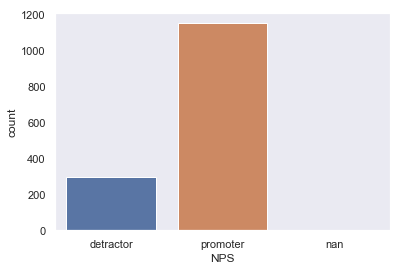

In [231]:
# we can see plainly the number of promoters vs detractors.
seaborn.countplot(x="NPS", data=data)

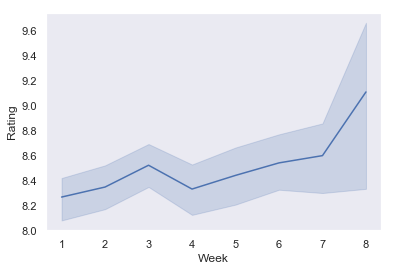

In [232]:
# the average rating goes up slowly throughout the term.
seaborn.lineplot(x='Week', y='Rating', data=data)

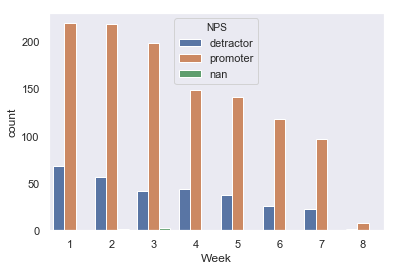

In [233]:
# over the course of the term, less students fill out the survey.
seaborn.countplot(x='Week', hue='NPS', data=data)

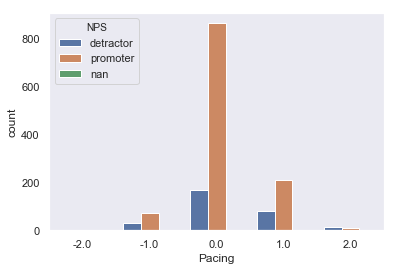

In [234]:
# over the course of the term, less students fill out the survey.
seaborn.countplot(x='Pacing', hue='NPS', data=data)

In [235]:
# classes taken at each location
data_crosstab = pandas.crosstab(data['Location'], data['Track'], normalize='index')
data_crosstab

Track,apps,"apps, explorer",games,"games, explorer",vr
Location,,,,,
atlanta,0.454545,0.545455,0.000000,0.000000,0.000000
beijing,0.974359,0.025641,0.000000,0.000000,0.000000
chicago,0.742857,0.257143,0.000000,0.000000,0.000000
hong kong,0.090909,0.909091,0.000000,0.000000,0.000000
los angeles,0.707547,0.000000,0.292453,0.000000,0.000000
new york city,0.587879,0.148485,0.178788,0.084848,0.000000
oakland,0.829787,0.170213,0.000000,0.000000,0.000000
redwood city,1.000000,0.000000,0.000000,0.000000,0.000000
san francisco,0.430556,0.213889,0.188889,0.000000,0.166667


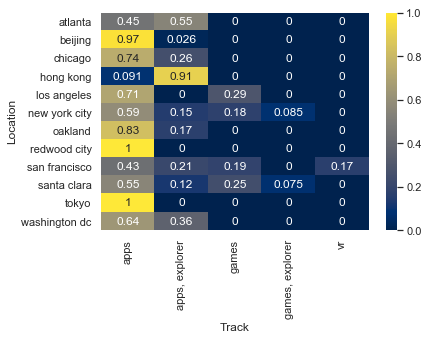

In [236]:
seaborn.heatmap(data_crosstab, cmap='cividis', annot=True)